## 1. Importing Dataset Properly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_test1=pd.read_csv("gender_submission.csv")

In [3]:
# Reading & understanding Training Dataset
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Reading & understanding Testing Dataset
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. EDA

### a) Pclass column

In [5]:
# Checking impact of Pclass column on the survived column in the train dataset.
# We will calculate mean of survived people in each class - This will tell us how many survived out of total for each class
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
# Total People in Each Class - Class 1 = 216, Class 2 = 184, Class 3= 491
# Survived People in Each Class - Class 1 = 136, Class 2 = 87, Class 3= 119
# Calc (136/216)*100=0.62
# That means Class 1 people have higher survival rate, then class 2 & then Class 3

In [7]:
# Here we can make use of mean, because values are 0 & 1 for Survival, if valued used for Survival were 2 & 1 respectively, 
# then mean will give inappropriate results

### b) Sex column

In [8]:
# Converting male to 1 & female to 0, for easy calculations

In [9]:
gender = {'male': 1,'female': 0} 
df_train.Sex = [gender[item] for item in df_train.Sex]
df_test.Sex  = [gender[item] for item in df_test.Sex]

In [10]:
# Checking impact of Sex column on the survived column in the train dataset.
# We will calculate mean of survived people in each class - This will tell us how many survived out of total for each class
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [11]:
# Total People in each Gender Class - Female = 314, Male = 577
# Survived People in each Gender Class - Female = 233, Male = 109
# Calc : Female Survival Rate (233/314)*100=0.742038 , Male Survival Rate (109/577)*100= 0.188908
# That means Female people have higher survival rate then men

### c) Embarked column

In [12]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [13]:
# People with destination C = Cherbourg (C = Cherbourg, Q = Queenstown, S = Southampton) survived with highest percentage

## 3. Cleaning Dataset

###  a) Finding missing values in any column : If % of NaN values in a column exceeeds 75%, delete that column

In [14]:
# Training Set
a=df_train.isnull().sum()/len(df_train.index)
b=a*100
c=round(b,2)
c

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [15]:
# Dropping column 'Cabin' as more than 75 percent values are NaN, so won't help in contributing
df_train=df_train.drop(['Cabin'] , axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [16]:
# Testing Set
a=df_test.isnull().sum()/len(df_test.index)
b=a*100
c=round(b,2)
c

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

In [17]:
# Dropping column 'Cabin' as more than 75 percent values are NaN, so won't help in contributing
df_test=df_test.drop(['Cabin'] , axis=1)
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [18]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


### b) Imputing missing values of column Age in train & test sets & of column Fare in test set

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

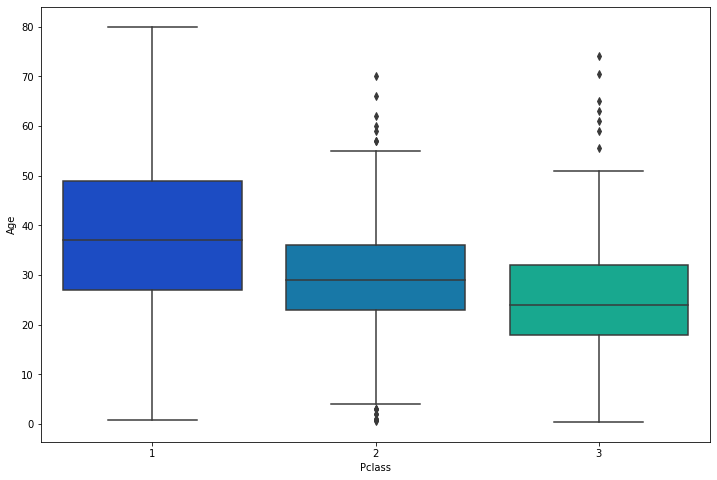

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [22]:
df_train['Age']=df_train[['Age','Pclass']].apply(impute_age,axis=1)

In [23]:
df_test['Age']=df_test[['Age','Pclass']].apply(impute_age,axis=1)

In [24]:
a=df_train.isnull().sum()/len(df_train.index)
b=a*100
c=round(b,2)
c

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
dtype: float64

In [25]:
df_test['Fare'].mean()

35.6271884892086

In [26]:
df_test['Fare'].fillna(35.63, inplace = True)

In [27]:
a=df_test.isnull().sum()/len(df_test.index)
b=a*100
c=round(b,2)
c

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

### c) Converting Male & Female values to 1 & 0 

In [28]:
gender = {'male': 1,'female': 0} 

In [30]:
df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


### d) For Categorical Variable 'Embarked column' with multiple independent values, create dummy features

In [31]:
dummy_train=pd.get_dummies(df_train[['Embarked']], drop_first=True)
df_train=pd.concat([df_train, dummy_train],axis=1)

In [32]:
dummy_test= pd.get_dummies(df_test[['Embarked']], drop_first= True)
df_test=pd.concat([df_test, dummy_test], axis=1)

In [33]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,1


In [34]:
# Dropping original column 'Embarked'
df_train=df_train.drop(['Embarked'], axis=1)
df_test =df_test.drop(['Embarked'], axis=1)

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,1


### e) Logically thinking, column 'Name' would not be a key factor in determining who got survived, hence dropping it

In [35]:
df_train=df_train.drop(['Name'], axis=1)
df_test=df_test.drop(['Name'], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,1,35.0,0,0,373450,8.0500,0,1


### f) Creating additional Feature 'Close Family Members' from columns : SibSp & Parch

sibsp - no. of siblings / spouses aboard the Titanic

parch - no. of parents / children aboard the Titanic

If each of both values of a column are 0, then values of 'Close Family Members' will be 0 ; otherwise 1

In [36]:
df_train['Close Family Member']=""

In [37]:
for ind in df_train.index: 
    df_train['Close Family Member'][ind]= 0 if (df_train['SibSp'][ind]==0 and df_train['Parch'][ind]==0) else 1

C:\Users\Bhanu Wadhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df_test['Close Family Member']=""

In [39]:
for ind in df_test.index: 
    df_test['Close Family Member'][ind]= 0 if (df_test['SibSp'][ind]==0 and df_test['Parch'][ind]==0) else 1

C:\Users\Bhanu Wadhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### g) Splitting df_train into X_train & y_train (PassengerId column is dropped)
###    Splitting df_test into X_test             (Survived column is not present, so no y_test)

In [40]:
y_train=df_train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
X_train=df_train.drop(['PassengerId','Survived'], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,22.0,1,0,A/5 21171,7.2500,0,1,1
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,1
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,1,0,35.0,1,0,113803,53.1000,0,1,1
4,3,1,35.0,0,0,373450,8.0500,0,1,0


In [42]:
X_test=df_test.drop(['PassengerId'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,34.5,0,0,330911,7.8292,1,0,0
1,3,0,47.0,1,0,363272,7.0000,0,1,1
2,2,1,62.0,0,0,240276,9.6875,1,0,0
3,3,1,27.0,0,0,315154,8.6625,0,1,0
4,3,0,22.0,1,1,3101298,12.2875,0,1,1


### h) Feature Scaling

In [43]:
# It helps in faster convergence of Gradient Descent
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()
X_train[['Age','Fare']]=scaler.fit_transform(X_train[['Age','Fare']])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,-0.533834,1,0,A/5 21171,-0.502445,0,1,1
1,1,0,0.674891,1,0,PC 17599,0.786845,0,0,1
2,3,0,-0.231653,0,0,STON/O2. 3101282,-0.488854,0,1,0
3,1,0,0.448255,1,0,113803,0.420730,0,1,1
4,3,1,0.448255,0,0,373450,-0.486337,0,1,0


In [45]:
X_test[['Age','Fare']]=scaler.fit_transform(X_test[['Age','Fare']])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,0.401768,0,0,330911,-0.498407,1,0,0
1,3,0,1.371615,1,0,363272,-0.513274,0,1,1
2,2,1,2.535433,0,0,240276,-0.465089,1,0,0
3,3,1,-0.180141,0,0,315154,-0.483466,0,1,0
4,3,0,-0.568080,1,1,3101298,-0.418472,0,1,1


### i) Dropping Ticket column as it has prefix letters

In [46]:
X_train=X_train.drop(['Ticket'], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,-0.533834,1,0,-0.502445,0,1,1
1,1,0,0.674891,1,0,0.786845,0,0,1
2,3,0,-0.231653,0,0,-0.488854,0,1,0
3,1,0,0.448255,1,0,0.420730,0,1,1
4,3,1,0.448255,0,0,-0.486337,0,1,0


In [47]:
X_test=X_test.drop(['Ticket'], axis=1)
X_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Close Family Member
0,3,1,0.401768,0,0,-0.498407,1,0,0
1,3,0,1.371615,1,0,-0.513274,0,1,1
2,2,1,2.535433,0,0,-0.465089,1,0,0
3,3,1,-0.180141,0,0,-0.483466,0,1,0
4,3,0,-0.568080,1,1,-0.418472,0,1,1


## 3) Looking at Correlations

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

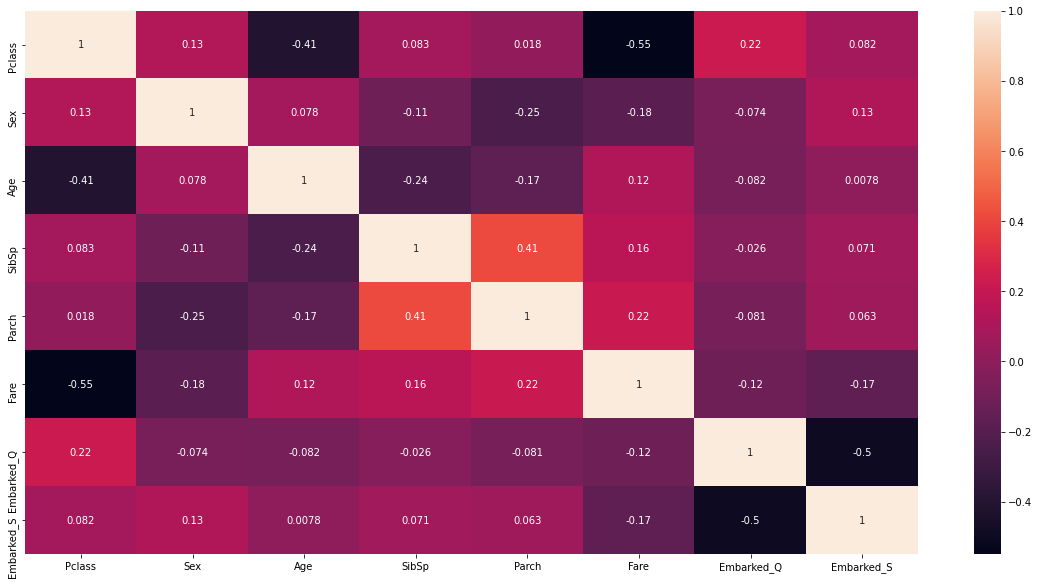

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show

In [50]:
# Highest co-relation is -0.55, so need not drop any column

# Model, predict and solve
Now we are ready to train a model and predict the required solution. 
<br>Our problem is a classification problem. 
<br>Following are the algorithms which we use:

<br>1) Logistic Regression
<br>2) KNN or k-Nearest Neighbors
<br>3) Support Vector Machines
<br>4) Naive Bayes classifier
<br>5) Decision Tree
<br>6) Random Forrest
<br>7) Perceptron
<br>8) Artificial neural network
<br>9) RVM or Relevance Vector Machine

In [51]:
# LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
# Predict churn on test data using the model just built
y_pred_LR = LR.predict(X_test)
Accuracy_Logistic = round(LR.score(X_train, y_train) * 100, 2)
Accuracy_Logistic

80.92

In [52]:
# KNN
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_KNN=knn.predict(X_test)
Accuracy_KNN=round(knn.score(X_train, y_train)*100,2)
Accuracy_KNN

87.54

In [53]:
# Support Vector Machines
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred_SVC = svc.predict(X_test)
Accuracy_SVC = round(svc.score(X_train, y_train) * 100, 2)
Accuracy_SVC
# The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. 
# Set gamma explicitly to 'auto' or 'scale' to avoid this warning."avoid this warning.", FutureWarning)

83.28

In [54]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred_GNB = gaussian.predict(X_test)

Accuracy_Gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
Accuracy_Gaussian

79.12

In [55]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_DT = decision_tree.predict(X_test)

Accuracy_DecisionTree = round(decision_tree.score(X_train, y_train) * 100, 2)
Accuracy_DecisionTree

98.2

In [56]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred_RF = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
Accuracy_RF = round(random_forest.score(X_train, y_train) * 100, 2)
Accuracy_RF

98.2

In [57]:
# stochastic gradient descent (SGD) learning

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred_SGD = sgd.predict(X_test)

sgd.score(X_train, y_train)

Accuracy_SGD = round(sgd.score(X_train, y_train) * 100, 2)
Accuracy_SGD

72.95

In [58]:
# Perceptron
perceptron = Perceptron(max_iter=5, tol=None)
perceptron.fit(X_train, y_train)

y_pred_Perc = perceptron.predict(X_test)

Accuracy_Perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
Accuracy_Perceptron

74.97

In [59]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Support Vector Machines', 'Gaussian Naive Bayes', 
              'Decision Tree', 'Random Forest', 'Stochastic Gradient Decent', 'Perceptron'],
    'Score': [Accuracy_Logistic, Accuracy_KNN, Accuracy_SVC, Accuracy_Gaussian, 
              Accuracy_DecisionTree, Accuracy_RF, Accuracy_SGD, Accuracy_Perceptron, ]})
result_df = results.sort_values(by='Score', ascending=False)

result_df.head(9)

,Model,Score
4,Decision Tree,98.20
5,Random Forest,98.20
1,KNN,87.54
2,Support Vector Machines,83.28
0,Logistic Regression,80.92
3,Gaussian Naive Bayes,79.12
7,Perceptron,74.97
6,Stochastic Gradient Decent,72.95


C:\Users\Bhanu Wadhwani\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Bhanu Wadhwani\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


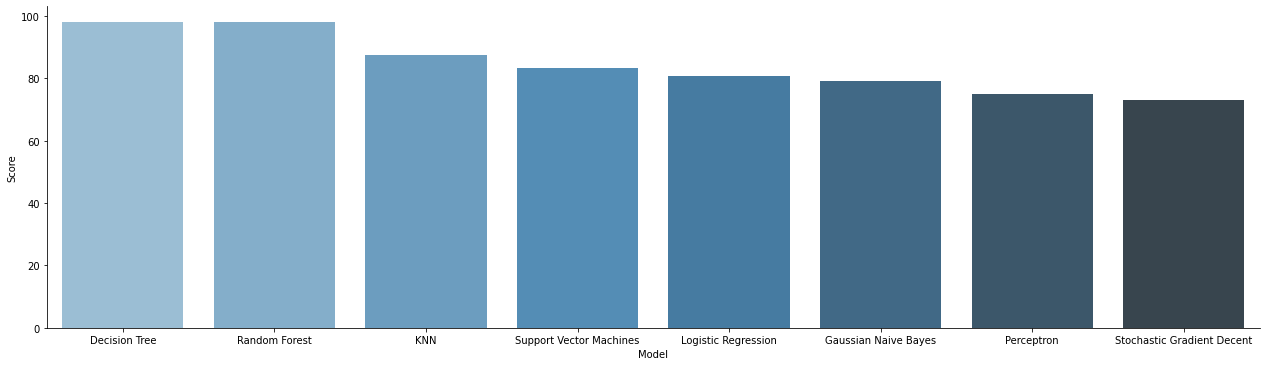

In [60]:
bestmodelgraph = result_df.head(9)
ax = sns.factorplot("Model", y="Score", data=bestmodelgraph,   palette='Blues_d',aspect=3.5,kind='bar')

In [65]:
sub_df = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred_DT
    })


In [66]:
sub_df.to_csv(r'I:\UpGrad\Kaggle\Titanic\Titanic_Result_v2.csv', index = False)

In [63]:
Kaggle_Score = 0.71